# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon

1.   List item
2.   List item


This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install numpy==1.23.5

# Without --no-cache-dir, smaller aws instances may have trouble installing

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 275.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 209.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 364.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 70.0 MB/s eta 0:00:00


### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
from google.colab import files
files.upload()
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle (1).json to kaggle (1).json


In [3]:
!mv "kaggle (1).json" ~/.kaggle/kaggle.json


In [20]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "fikirtsi"
kaggle_key = "b96e40d765d572b734fbe2172eec0a6c"
# Save API token the kaggle.json file
with open("/root/kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

FileNotFoundError: [Errno 2] No such file or directory: '/root/kaggle/kaggle.json'

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
!ls -a ~/.kaggle


.  ..  kaggle.json


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
train_features = train.drop(columns=['datetime', 'casual', 'registered'])
predictor = TabularPredictor(label='count', path='models/').fit(train_features)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       7.60 GB / 12.67 GB (59.9%)
Disk Space Avail:   64.25 GB / 107.72 GB (59.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference sp

[1000]	valid_set's rmse: 149.35


	-149.2611	 = Validation score   (-root_mean_squared_error)
	6.5s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: LightGBM ...
	-149.7392	 = Validation score   (-root_mean_squared_error)
	0.84s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-157.4759	 = Validation score   (-root_mean_squared_error)
	7.65s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
	-148.4542	 = Validation score   (-root_mean_squared_error)
	3.19s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-156.6279	 = Validation score   (-root_mean_squared_error)
	4.57s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-149.6268	 = Validation score   (-root_mean_squared_error)
	11.9s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-149.5373	 = Validation score   (-root_mean_squared_error)
	0.77s	 = Training   runtime
	0.01s	 = Validati

In [36]:
!pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-core 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-timeseries 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -146.953137  root_mean_squared_error       0.398340  100.168817                0.000562           0.016991            2       True         12
1              CatBoost -148.454154  root_mean_squared_error       0.005622    3.194451                0.005622           3.194451            1       True          6
2            LightGBMXT -149.261116  root_mean_squared_error       0.190608    6.495937                0.190608           6.495937            1       True          3
3               XGBoost -149.537296  root_mean_squared_error       0.011144    0.770373                0.011144           0.770373            1       True          9
4       NeuralNetFastAI -149.626790  root_mean_squared_error       0.032843   11.904970                0.032

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -165.53397450397145,
  'KNeighborsDist': -176.14633992857307,
  'LightGBMXT': -149.26111634463714,
  'LightGBM': -149.7391705015682,
  'RandomForestMSE': -157.47587667266154,
  'CatBoost': -148.45415448494336,
  'ExtraTreesMSE': -156.62791726233485,
  'NeuralNetFastAI': -149.6267899135892,
  'XGBoost': -149.53729639132013,
  'NeuralNetTorch': -150.75462179558025,
  'LightGBMLarge': -149.79317296662194,
  'WeightedEnsemble_L2': -146.9531371669473},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

,count
0,121.939148
1,62.851067
2,62.851067
3,81.970406
4,81.970406


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()


,count
count,6493.000000
mean,183.596146
std,108.055023
min,7.003276
25%,96.727814
50%,158.440170
75%,259.325684
max,600.240234


In [15]:
# How many negative values do we have?
num_negative = (predictions < 0).sum()


In [16]:
# Set them to zero
predictions = predictions.clip(lower=0)


### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 995kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2025-06-09 12:15:50.740000  first raw submission  SubmissionStatus.COMPLETE  1.29403      1.29403       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

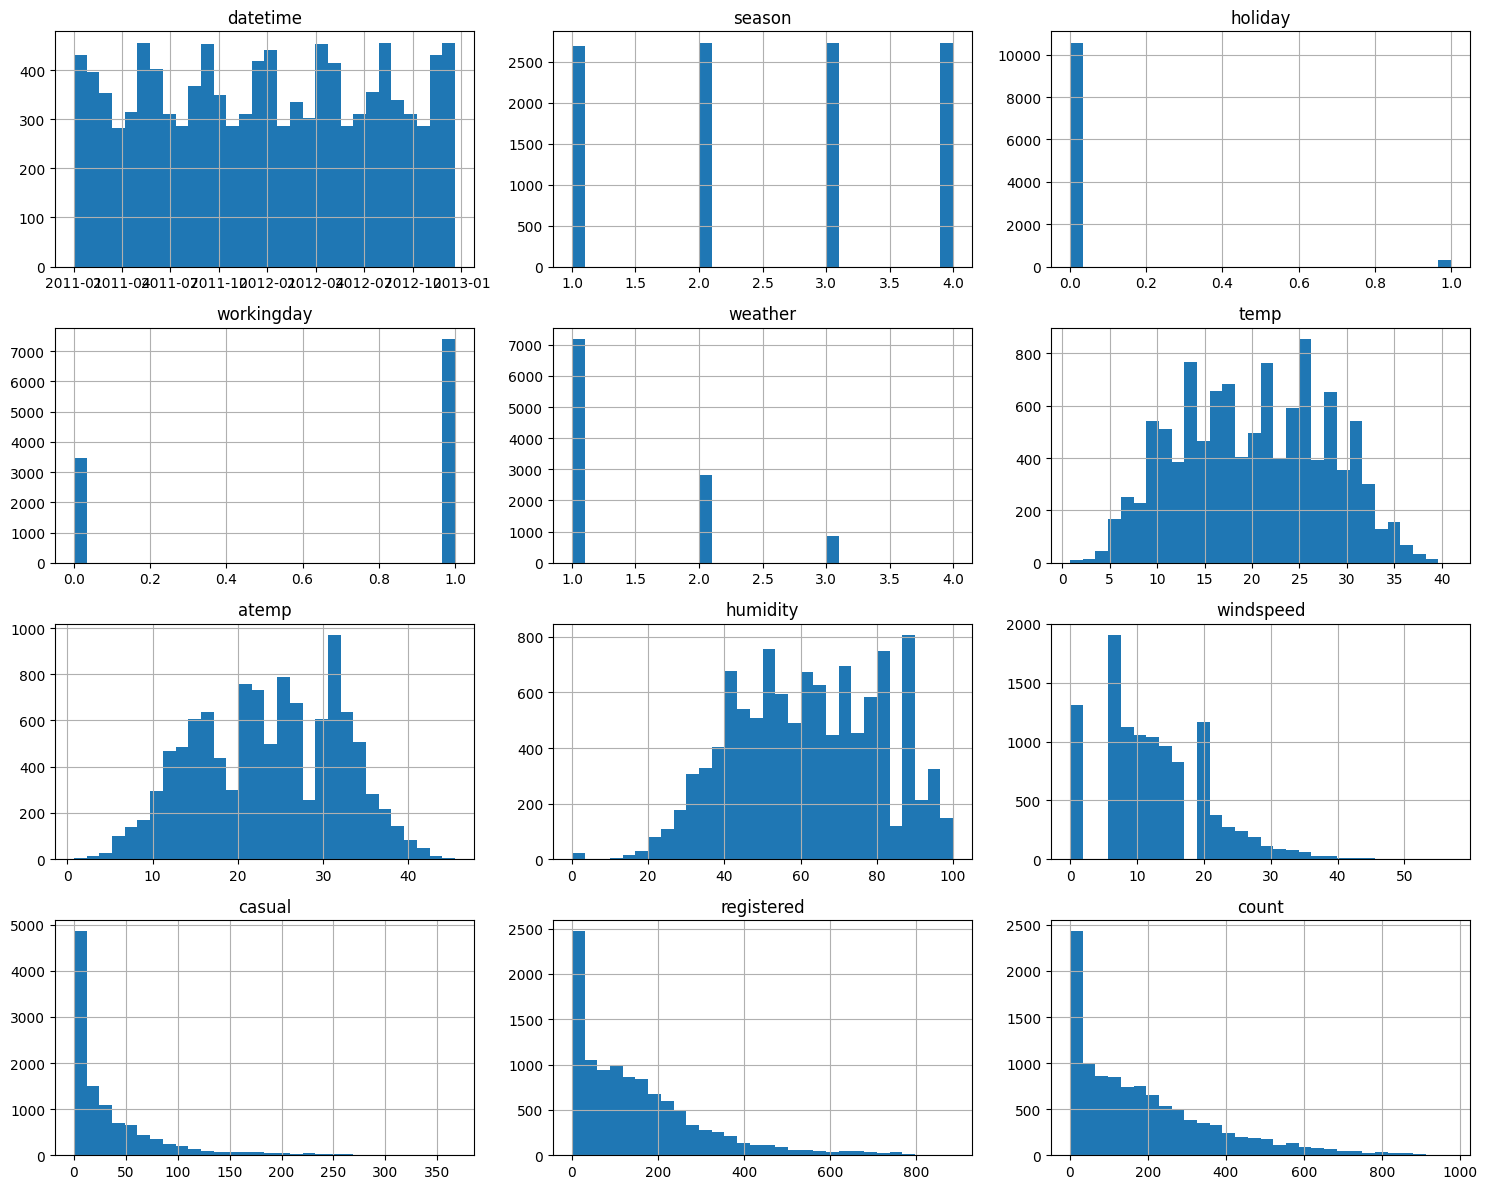

In [18]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

In [19]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [20]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [21]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


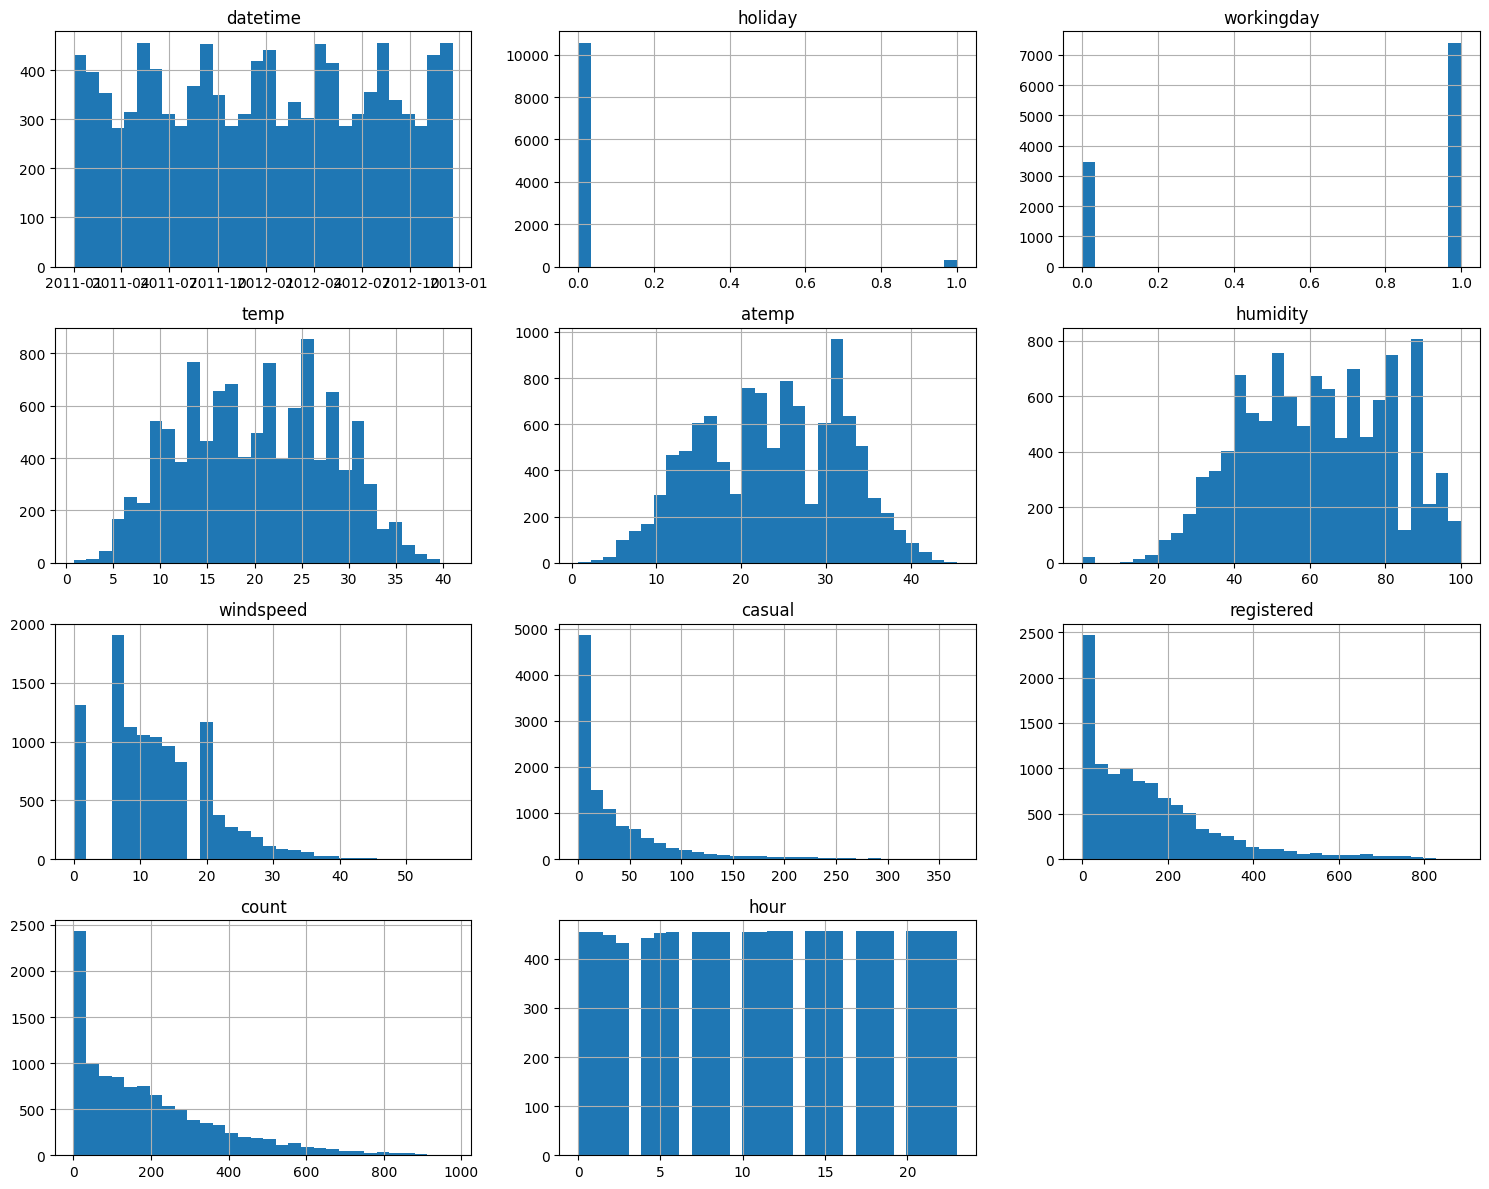

In [22]:
# View histogram of all features again now with the hour feature
train.hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [23]:
train_features = train.drop(columns=['datetime', 'casual', 'registered'])
predictor_new_features = TabularPredictor(label='count',path='models_new_features/').fit(train_features)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.96 GB / 12.67 GB (86.5%)
Disk Space Avail:   63.77 GB / 107.72 GB (59.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference s

[1000]	valid_set's rmse: 67.7649
[2000]	valid_set's rmse: 66.8048
[3000]	valid_set's rmse: 66.7438


	-66.7172	 = Validation score   (-root_mean_squared_error)
	4.43s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 66.9495


	-66.7475	 = Validation score   (-root_mean_squared_error)
	2.6s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-71.6797	 = Validation score   (-root_mean_squared_error)
	9.09s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost ...
	-68.1714	 = Validation score   (-root_mean_squared_error)
	80.05s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-71.8661	 = Validation score   (-root_mean_squared_error)
	5.52s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-74.7129	 = Validation score   (-root_mean_squared_error)
	12.39s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-69.1858	 = Validation score   (-root_mean_squared_error)
	2.82s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-68.2865	 = Validation score   (-root_mean_squared_error)
	173.08s	 = Training   runtime
	0.02s	 = Valida

In [30]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -64.062033  root_mean_squared_error       0.788182  235.989753                0.000528           0.017317            2       True         12
1            LightGBMXT  -66.717194  root_mean_squared_error       0.562550    4.584329                0.562550           4.584329            1       True          3
2              LightGBM  -66.747538  root_mean_squared_error       0.210436    1.956213                0.210436           1.956213            1       True          4
3              CatBoost  -68.171432  root_mean_squared_error       0.018161   99.297715                0.018161          99.297715            1       True          6
4        NeuralNetTorch  -68.286517  root_mean_squared_error       0.014668  229.431896                0.014

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -130.46108802791724,
  'KNeighborsDist': -132.04393838213642,
  'LightGBMXT': -66.71719390600659,
  'LightGBM': -66.74753834398142,
  'RandomForestMSE': -71.67969723616666,
  'CatBoost': -68.17143170928962,
  'ExtraTreesMSE': -71.86605274768777,
  'NeuralNetFastAI': -74.71285993302818,
  'XGBoost': -69.18578003551816,
  'NeuralNetTorch': -68.2865172275998,
  'LightGBMLarge': -69.02249336928197,
  'WeightedEnsemble_L2': -64.06203319848666},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighbo

In [24]:
# Remember to set all negative values to zero
predictions_new = predictor_new_features.predict(test)
predictions_new = predictions_new.clip(lower=0)


In [25]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 1.04MB/s]
Successfully submitted to Bike Sharing Demand

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-09 12:39:45.093000  new features          SubmissionStatus.COMPLETE  0.55398      0.55398       
submission.csv               2025-06-09 12:15:50.740000  first raw submission  SubmissionStatus.COMPLETE  1.29403      1.29403       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [27]:
hyperparameters = {
    'GBM': {},  # Gradient Boosted Machines (LightGBM)
        'CAT': {},  # CatBoost
        'XGB': {},  # XGBoost

}
hyperparameter_tune_kwargs = {
    'num_trials': 20,
        'scheduler': 'local',  # or 'rl' for more advanced tuning
        'searcher': 'auto',    # Can be 'local', 'fifo', 'async', or others
}
predictor_new_hpo = TabularPredictor(label='count', path='models_hpo/').fit(train.drop(columns=['datetime', 'casual', 'registered']),hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.36 GB / 12.67 GB (73.9%)
Disk Space Avail:   62.53 GB / 107.72 GB (58.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference sp

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 66.8827
[1000]	valid_set's rmse: 67.6506
[1000]	valid_set's rmse: 68.7764
[2000]	valid_set's rmse: 67.449
[3000]	valid_set's rmse: 67.2281
[4000]	valid_set's rmse: 67.2714
[1000]	valid_set's rmse: 67.6515
[1000]	valid_set's rmse: 68.1962
[2000]	valid_set's rmse: 67.4303
[1000]	valid_set's rmse: 67.2081
[1000]	valid_set's rmse: 68.5924
[2000]	valid_set's rmse: 67.7363
[3000]	valid_set's rmse: 67.6387
[1000]	valid_set's rmse: 68.0877
[1000]	valid_set's rmse: 67.8792
[2000]	valid_set's rmse: 67.1242
[3000]	valid_set's rmse: 67.071
[1000]	valid_set's rmse: 70.4162
[2000]	valid_set's rmse: 68.6919
[3000]	valid_set's rmse: 67.8415
[4000]	valid_set's rmse: 67.6428
[5000]	valid_set's rmse: 67.5196
[6000]	valid_set's rmse: 67.4514
[7000]	valid_set's rmse: 67.3586
[8000]	valid_set's rmse: 67.3397
[9000]	valid_set's rmse: 67.2828
[10000]	valid_set's rmse: 67.2728
[1000]	valid_set's rmse: 68.2508
[2000]	valid_set's rmse: 67.3828
[3000]	valid_set's rmse: 67.3449
[1000]	vali

Fitted model: LightGBM/T1 ...
	-66.8715	 = Validation score   (-root_mean_squared_error)
	2.63s	 = Training   runtime
	0.45s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-67.2578	 = Validation score   (-root_mean_squared_error)
	2.03s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-67.5555	 = Validation score   (-root_mean_squared_error)
	3.15s	 = Training   runtime
	0.51s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-67.1859	 = Validation score   (-root_mean_squared_error)
	11.97s	 = Training   runtime
	2.28s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-67.3742	 = Validation score   (-root_mean_squared_error)
	1.67s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-67.6119	 = Validation score   (-root_mean_squared_error)
	4.58s	 = Training   runtime
	0.77s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-67.4526	 = Validation score   (-root_mean_squared_error)
	2.49s	 = Training   runtime

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: CatBoost/T1 ...
	-65.9899	 = Validation score   (-root_mean_squared_error)
	228.23s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: CatBoost/T2 ...
	-66.7458	 = Validation score   (-root_mean_squared_error)
	116.53s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: CatBoost/T3 ...
	-65.2802	 = Validation score   (-root_mean_squared_error)
	181.32s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: CatBoost/T4 ...
	-66.1831	 = Validation score   (-root_mean_squared_error)
	286.47s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: CatBoost/T5 ...
	-67.0861	 = Validation score   (-root_mean_squared_error)
	261.12s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: CatBoost/T6 ...
	-65.6667	 = Validation score   (-root_mean_squared_error)
	214.59s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: CatBoost/T7 ...
	-67.2905	 = Validation score   (-root_mean_squared_error)
	170.23s	 = Train

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-67.1595	 = Validation score   (-root_mean_squared_error)
	1.36s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-67.748	 = Validation score   (-root_mean_squared_error)
	3.04s	 = Training   runtime
	0.26s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-67.7294	 = Validation score   (-root_mean_squared_error)
	4.1s	 = Training   runtime
	0.38s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-69.5669	 = Validation score   (-root_mean_squared_error)
	5.52s	 = Training   runtime
	0.3s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-74.4371	 = Validation score   (-root_mean_squared_error)
	3.26s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-69.4997	 = Validation score   (-root_mean_squared_error)
	8.07s	 = Training   runtime
	0.41s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-67.7545	 = Validation score   (-root_mean_squared_error)
	4.6s	 = Training   runtime
	0.59s	 = V

In [28]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -64.624798  root_mean_squared_error       0.668679   65.145161                0.000655           0.018181            2       True         61
1          CatBoost/T19 -65.083494  root_mean_squared_error       0.014793   30.434615                0.014793          30.434615            1       True         39
2          CatBoost/T14 -65.201597  root_mean_squared_error       0.015733   30.051219                0.015733          30.051219            1       True         34
3          CatBoost/T20 -65.216319  root_mean_squared_error       0.033903  131.620826                0.033903         131.620826            1       True         40
4           CatBoost/T3 -65.280222  root_mean_squared_error       0.065325  181.315938                0.065325   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T14': 'LGBModel',
  'LightGBM/T15': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T18': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'LightGBM/T20': 'LGBModel',
  'CatBoost/T1': 'CatBoostModel',
  'CatBoost/T2': 'CatBoostModel',
  'CatBoost/T3': 'CatBoostModel',
  'CatBoost/T4': 'CatBoostModel',
  'CatBoost/T5': 'CatBoostModel',
  'CatBoost/T6': 'CatBoostModel',
  'CatBoost/T7': 'CatBoostModel',
  'CatBoost/T8': 'CatBoostModel',
  'CatBoost/T9': 'CatBoostModel',
  'CatBoost/T10': 'CatBoostModel',
  'CatBoost/T11': 'CatBoostModel',
  'CatBoost/T12': 

In [39]:
# Remember to set all negative values to zero
predictions_hpo = predictor_new_hpo.predict(test)
predictions_hpo = predictions_hpo.clip(lower=0)


In [40]:
submission_new_hpo = test[["datetime"]].copy()
submission_new_hpo["count"] = predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 187k/187k [00:00<00:00, 292kB/s]
Successfully submitted to Bike Sharing Demand

In [42]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-09 18:37:58.060000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.66473      0.66473       
submission_new_hpo.csv       2025-06-09 18:34:31.373000  new features with hyperparameters  SubmissionStatus.ERROR                                
submission_new_hpo.csv       2025-06-09 18:33:39.053000  new features with hyperparameters  SubmissionStatus.ERROR                                


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

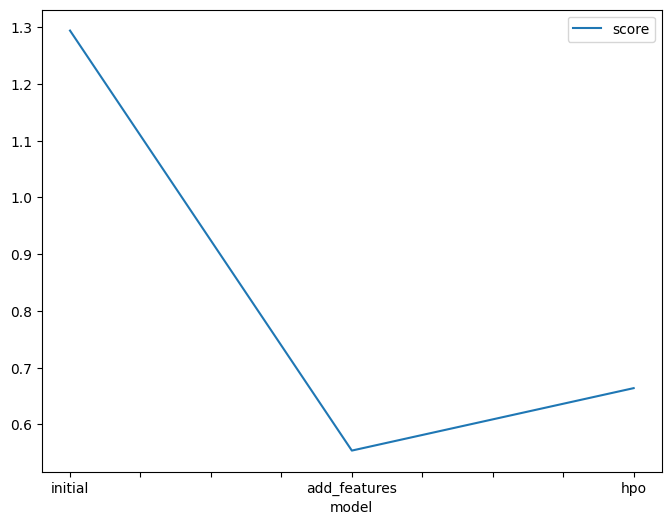

In [44]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.29403, 0.55398 , 0.664]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

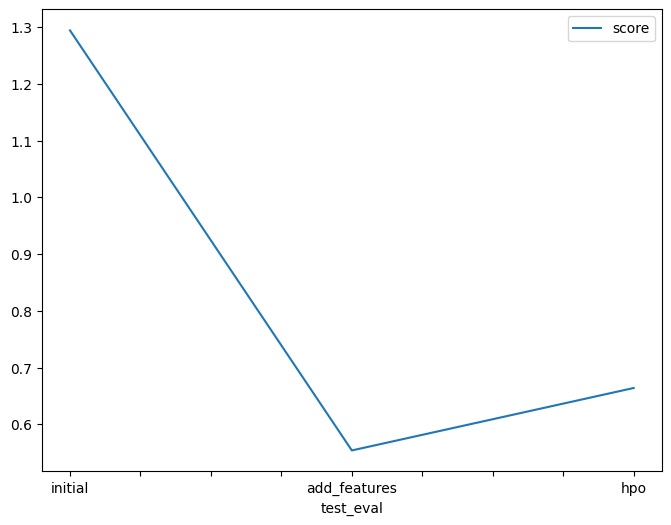

In [45]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.29403, 0.55398 , 0.664]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [46]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["-", "-", "learning_rate: 0.05"],
    "hpo2": ["-", "-", "max_depth: 8"],
    "hpo3": ["-", "-", "num_boost_round: 300"],
    "score": [1.29403, 0.55398, 0.664]
})

,model,hpo1,hpo2,hpo3,score
0,initial,-,-,-,1.29403
1,add_features,-,-,-,0.55398
2,hpo,learning_rate: 0.05,max_depth: 8,num_boost_round: 300,0.66400
